In [5]:
import numpy as np
import pandas as pd
from IPython.display import display

import visuals as vs

%matplotlib inline

in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
def accuracy_score(truth, pred):
    if len(truth) == len(pred):
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    else:
        return "Number of predictions does not match number of outcomes!"

predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


In [9]:
def prediction_0(data):
    predictions = []
    
    for _, passenger in data.iterrows():
        predictions.append(0)
    
    return pd.Series(predictions)

predictions = prediction_0(data)

In [10]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


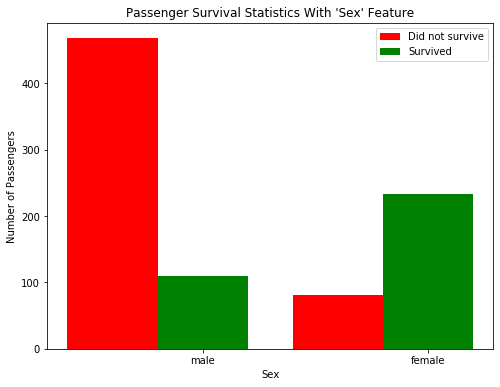

In [12]:
vs.survival_stats(data, outcomes, 'Sex')

In [14]:
def prediction_1(data):
    predictions = []
    
    for _, passanger in data.iterrows():
        if passanger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

predictions = prediction_1(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


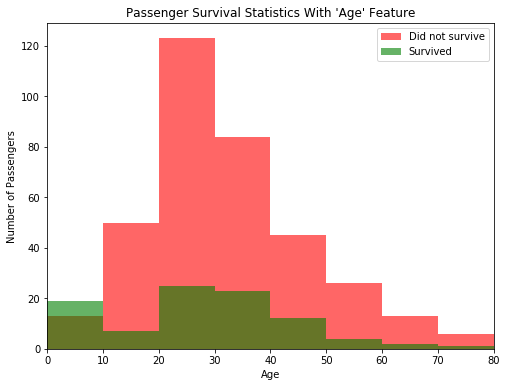

In [15]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [21]:
def prediction_2(data):
    predictions = []
    
    for _, passanger in data.iterrows():
        if passanger['Sex'] == 'female':
            predictions.append(1)
        elif passanger['Sex'] == 'male' and passanger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

predictions = prediction_2(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


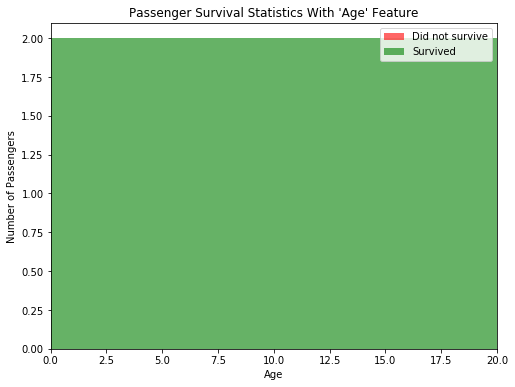

In [25]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18", "Pclass == 1"])

In [30]:
def prediction_3(data):
    predictions = []
    
    for _, passanger in data.iterrows():
        if passanger['Sex'] == 'female':
            if passanger['Pclass'] == 3:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            if passanger['Age'] < 10 and passanger['Pclass'] in (1, 2):
                predictions.append(1)
            elif passanger['Age'] < 18 and passanger['Pclass'] == 1:
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)

predictions = prediction_3(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 80.13%.
